# [실습 순서]
1. 파일로부터 DataFrame 생성
1. Viewing Data
1. Cleaning Data
1. Finding Relationships (Correlation, Plotting)

# 1. 파일로부터 DataFrame 생성

## 1-1. CSV(Comma Seperated Value) 파일 : DataFrame = Pandas.**read_csv**(*filename*)

In [ ]:
import pandas as pd

df_data = pd.read_csv('data.csv')
df_data

## 1-2. JSON 파일 :  : DataFrame = Pandas.**read_json**(*filename*)
* JSON 포맷은 파이썬의 Dictionary와 같은 구조로 파일이 없는 경우, dictionary에 저장하여 바로 loading 가능함

In [ ]:
df_json = pd.read_json('data.json')
df_json

# 2. Viewing Data
  * **to_string()** : string으로 변환하여 전체 데이터 확인하기
  * **head**(*num_row*) : *num_row* = 5
  * **tail**(*num_row*) : *num_row* = 5
  * **info**() : null값 상황 확인
  * *pandas*.**options.display.max_rows** : 한번에 출력가능한 maximum row의 수
 

## 2-1. String으로 전체 데이터 확인해 보기 : *dataframe*.to_string()

In [ ]:
df_data.to_string()

* DataFrame의 전체 row를 출력하도록 설정 : *pandas*.**options.display.max_rows**

In [ ]:
pd.options.display.max_rows

In [ ]:
pd.options.display.max_rows = 300
df_data

## 2-2. 시작 및 마지막 데이터 확인 : head, tail

In [ ]:
df_data.head(10)

In [ ]:
df_data.tail(10)

## 2-3. 전체적 정보 및 null값 항목 확인 : info

In [ ]:
df_data.info() #인덱스3번 Calories에 결측치가 있음을 확인 가능.

## 2-4. 지정된 범위의 데이터 접근 : loc, iloc

In [ ]:
df_data.loc[[17, 27, 91, 118]]

In [ ]:
df_data.loc[:,'Maxpulse':'Calories'].head()

In [ ]:
df_data.loc[:,['Calories']].head()

#### [index label이 있는 경우]

In [ ]:
data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

df_temp = pd.DataFrame(data, index=['day1','day2','day3'])
df_temp

In [ ]:
df_temp.loc[['day1']] #중괄호로 이중 묶어주면, 데이터프레임으로.

In [ ]:
df_temp.loc['day1':'day3'] #배열일 때는 중괄호 하나도 ok

# 2. Cleansing Data
  - Empty Cells
  - Data in wrong format
  - Wrong data
  - Duplicates

## 2-1. Cleaning Empty Cells (null, NaN - 결측치)
  - Null값이 있는 row 삭제 : 
  - Empty Values를 새로운 값으로 채우기 : Mean, Median, Mode 등

### 2-1-1.  Null값이 있는 Row 삭제 : dropna
  * *dataframe*.**dropna**(axis, how, thresh, subset, inplace)
    - inplace = False
    - subset = *List* (지정 된 범위에 null이 있을 경우 Row 삭제)

In [ ]:
import pandas as pd
df_data = pd.read_csv('data_d.csv')
df_data_backup = df_data.copy()
# df_data.dropna(inplace=True)
df_data_backup
df_data = df_data_backup.copy()
df_data

### 2-1-2. 새로운 값으로 채우기 : fillna
* *dataframe*.**fillna**(**value**, method, axis, inplace, limit, downcast)
    * inplace = False
    * 특정 컬럼에 해당하는 값만 채우려는 경우 : DataFrame **[** *name* **]**.**fillna**(...)

In [ ]:
df_data

* mean, median, mode 값으로 채우기
    - Mean - The average value
    - Median - The mid point value
    - Mode - The most common value -> index 0에 최빈값을 갖는 DataFrame 반환

In [ ]:
mean_value = df_data['Calories'].mean()
# mean_value

#특정 컬럼만 mean_value로 대체 가능.
df_data['Calories'].fillna(mean_value, inplace=True)
df_data

In [ ]:
df_data = df_data_backup.copy()
# new_value = df_data['Calories'].mean()
new_value = df_data['Calories'].mode()[0] #모드는 단일값이 아니라 df형태로 반환
print(new_value)

df_data['Calories'].fillna(new_value, inplace=True)
df_data

## 2-2. Cleaning Wrong Format
* *dataframe* = *pd*.**to_datetime**(*dataframe*)
* *dataframe[col_name]* = *pd*.**to_datetime**(*dataframe[col_name]*)
* Correct Format으로 변환
* 해당 Row 삭제

#### Date Format 통일하기
* *pandas*.**to_datetime**(*dataframe*)

In [ ]:
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data

#### Date 값이 null인 Row 삭제

In [ ]:
df_data.dropna(subset=['Date'], inplace=True)
df_data

## 2-3. Cleaning Wrong Data
* small data : 눈으로 확인하고 수정하기
* 규칙을 정해서 수정하기
* 해당 row 삭제하기

#### 눈으로 확인 후 수정하기

In [ ]:
df_data = pd.read_csv('data.csv')
df_data

In [ ]:
# df_data.loc[[17, 27, 91, 118]]
df_data.loc[17,'Calories'] = 320.5
df_data.loc[[17]]

#### 규칙을 정해서 수정하기

In [ ]:
#Maxpulse의 값이 120미만인 데이터는 120으로 변경
for idx in df_data.index:
    if df_data.loc[idx, 'Maxpulse'] < 120:
        df_data.loc[idx, 'Maxpulse'] = 120
df_data

#### 해당 Row 삭제

In [ ]:
#Maxpulse의 값이 120미만인 데이터는 삭제
df_data = pd.read_csv('data.csv')
for idx in df_data.index:
    if df_data.loc[idx, 'Maxpulse'] < 120:
        df_data.drop(idx, inplace=True)
df_data

## 2-4. Removing Duplicates
1. 중복값(duplicated values)확인 : *dataframe*.**duplicated**(subset, keep)
2. 중복값 삭제 : *dataframe*.**drop_duplicates**(inplace=True)

In [ ]:
df_data = pd.read_csv('data.csv')
df_data.drop_duplicates(inplace=True)
df_data.duplicated() #중복데이터 확인

# 3. Finding Relationship
## 3-1. Correlation
* *dataframe*.**corr**(method, min_periods)
  - Pefect, Good, Bad relationship

In [10]:
import pandas as pd
df_data = pd.read_csv('data.csv')
df_data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [11]:
# Empty Cells (dropna만 실행하면 반영 안됨. inplace 추가 필수)
df_data.dropna(inplace=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  164 non-null    int64  
 1   Pulse     164 non-null    int64  
 2   Maxpulse  164 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


In [22]:
# Data in wrong format
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  157 non-null    int64  
 1   Pulse     157 non-null    int64  
 2   Maxpulse  157 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.1 KB


In [12]:
# Wrong data
pd.options.display.max_rows = 9999
df_data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [19]:
# Duplicates
df_data.duplicated()
df_data.drop_duplicates(inplace=True)
df_data

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [25]:
df_data.corr() #correlation

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.167770,-0.000501,0.923053
Pulse,-0.167770,1.000000,0.784994,0.015301
Maxpulse,-0.000501,0.784994,1.000000,0.195309
Calories,0.923053,0.015301,0.195309,1.000000


## 3-2. Plotting
* *DataFrame*.**plot**(kind=*type*, x=*x-value*, y=*y-value*)

<Axes: >

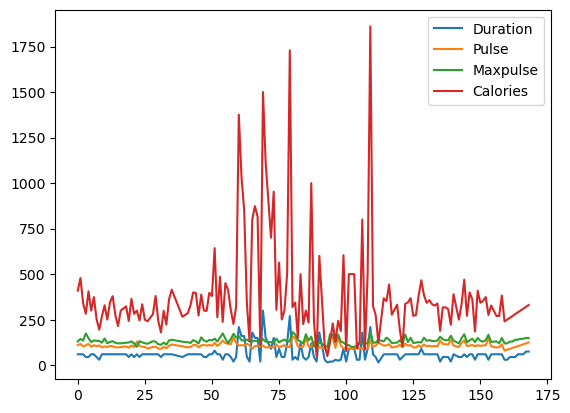

In [26]:
df_data.plot()

* Scatter : Duration - Calories, Duration - Pulse, Duration - Maxpulse

<Axes: xlabel='Duration', ylabel='Calories'>

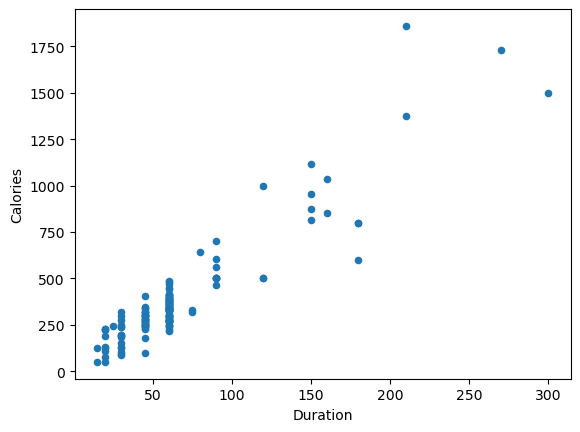

In [27]:
df_data.plot(kind='scatter', x='Duration', y='Calories')

<Axes: xlabel='Duration', ylabel='Pulse'>

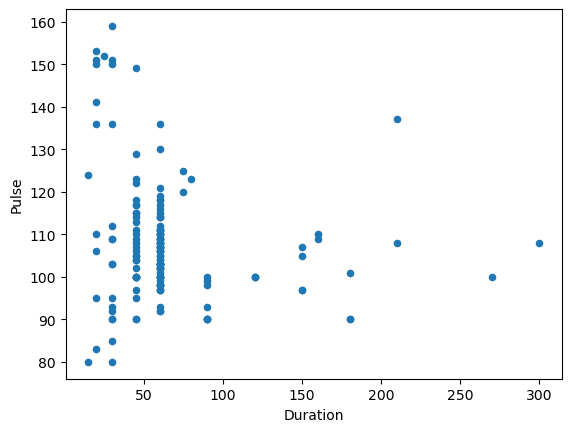

In [29]:
df_data.plot(kind='scatter', x='Duration', y='Pulse')

<Axes: ylabel='Frequency'>

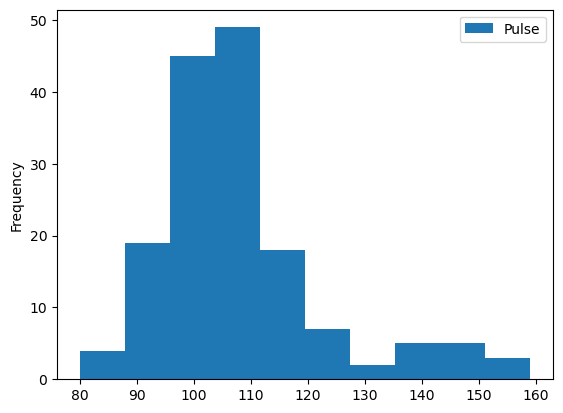

In [30]:
df_data.plot(kind='hist', x='Duration', y='Pulse')

* Histogram for 'Duration'